In [ ]:
#============= TASK-1 ==================#

In [ ]:
#For data
import numpy as np
import pandas as pd

In [ ]:
#For Charts
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [ ]:
#Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_excel("/content/house_club.xlsx")
data.head()

,City,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,Bangalore,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,Bangalore,8358000,1675,Doddanekundi,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Bangalore,6845000,1670,Kengeri,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City                 32963 non-null  object
 1   Price                32963 non-null  int64 
 2   Area                 32963 non-null  int64 
 3   Location             32963 non-null  object
 4   No. of Bedrooms      32963 non-null  int64 
 5   Resale               32963 non-null  int64 
 6   MaintenanceStaff     32963 non-null  int64 
 7   Gymnasium            32963 non-null  int64 
 8   SwimmingPool         32963 non-null  int64 
 9   LandscapedGardens    32963 non-null  int64 
 10  JoggingTrack         32963 non-null  int64 
 11  RainWaterHarvesting  32963 non-null  int64 
 12  IndoorGames          32963 non-null  int64 
 13  ShoppingMall         32963 non-null  int64 
 14  Intercom             32963 non-null  int64 
 15  SportsFacility       32963 non-null  int64 
 16  ATM 

In [ ]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
count,3.296300e+04,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,...,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000
mean,1.168672e+07,1293.362194,2.411765,0.381397,6.296454,6.403725,6.371325,6.351151,6.346328,6.356855,...,6.463671,6.272154,6.335497,6.259169,6.250887,6.261293,6.260413,6.259867,6.250675,6.260019
std,2.307368e+07,763.703754,0.812800,0.485737,4.075024,3.917995,3.966385,3.996086,4.003140,3.987722,...,3.826128,4.109373,4.018912,4.127551,4.139083,4.124586,4.125815,4.126577,4.139378,4.126365
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.071500e+06,853.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.711000e+06,1125.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.200000e+07,1500.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
data.isnull().sum()

,0
City,0
Price,0
Area,0
Location,0
No. of Bedrooms,0
Resale,0
MaintenanceStaff,0
Gymnasium,0
SwimmingPool,0
LandscapedGardens,0


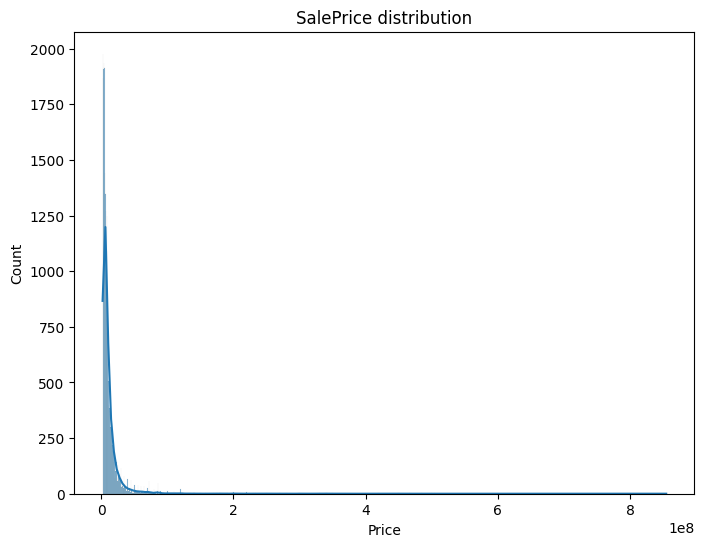

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['Price'], kde=True)
plt.title('SalePrice distribution')
plt.show()

In [ ]:
#2. Build a Simple Linear Regression model to predict the Sale price of the house. Use Area as the independent variable.
df1 = data

In [ ]:
x = df1[['Area']]
x

,Area
0,3340
1,1045
2,1179
3,1675
4,1670
...,...
32958,1180
32959,530
32960,700
32961,995


In [ ]:
y = df1[['Price']]
y

,Price
0,30000000
1,7888000
2,4866000
3,8358000
4,6845000
...,...
32958,14500000
32959,14500000
32960,4100000
32961,2750000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
liner = LinearRegression()
liner_model = liner.fit(x_train,y_train)

In [ ]:
def result(model):
  y_pre = model.predict(x_test)
  mse = mean_squared_error(y_test,y_pre)
  r2 = r2_score(y_test, y_pre)
  return mse,r2

In [ ]:
models = [liner_model]
for i in models:
  mse, r2 = result(i)
  print("\tmodel: ",i)
  print("MSE: ",mse)
  print("R2: ",r2)

	model:  LinearRegression()
MSE:  487436867711123.25
R2:  0.10823807413216724


In [ ]:
#3. Build Multiple Linear Regression model to predict Sale price of the house.
df2 = data

In [ ]:
lcoder= LabelEncoder()
data['City_label'] = lcoder.fit_transform(data['City'])
data['Location_label'] = lcoder.fit_transform(data['Location'])

In [ ]:
df2

,City,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium,City_label,Location_label
0,Bangalore,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,595
1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,374
2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,698
3,Bangalore,8358000,1675,Doddanekundi,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,398
4,Bangalore,6845000,1670,Kengeri,3,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,Mumbai,14500000,1180,Mira Road East,2,0,9,9,9,9,...,9,9,9,9,9,9,9,9,5,940
32959,Mumbai,14500000,530,Naigaon East,1,1,9,9,9,9,...,9,9,9,9,9,9,9,9,5,996
32960,Mumbai,4100000,700,Shirgaon,1,0,9,9,9,9,...,9,9,9,9,9,9,9,9,5,1491
32961,Mumbai,2750000,995,Mira Road East,2,0,9,9,9,9,...,9,9,9,9,9,9,9,9,5,940


In [ ]:
x = df2.drop(['City','Location','Price'],axis=1)
y = df2['Price']

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
liner = LinearRegression()
liner_model = liner.fit(x_train,y_train)

In [ ]:
def result(model):
  y_pre = model.predict(x_test)
  mse = mean_squared_error(y_test,y_pre)
  r2 = r2_score(y_test, y_pre)
  return mse,r2

In [ ]:
models = [liner_model]
for i in models:
  mse, r2 = result(i)
  print("\tmodel: ",i)
  print("MSE: ",mse)
  print("R2: ",r2)

	model:  LinearRegression()
MSE:  479360774097214.56
R2:  0.12301322404736881


In [ ]:
#4. Use dimensionality reduction technique PCA/LDA and build Multiple Linear
#Regression model to predict Sale price of the house.
df3 =data

In [ ]:
lcoder= LabelEncoder()
data['City_label'] = lcoder.fit_transform(data['City'])
data['Location_label'] = lcoder.fit_transform(data['Location'])

In [ ]:
x = df2.drop(['City','Location','Price'],axis=1)


y = df2['Price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [ ]:
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.87460571 0.04568644]


In [ ]:
liner = LinearRegression()
liner_model = liner.fit(x_train,y_train)

In [ ]:
def result(model):
  y_pre = model.predict(x_test)
  mse = mean_squared_error(y_test,y_pre)
  r2 = r2_score(y_test, y_pre)
  return mse,r2

In [ ]:
models = [liner_model]
for i in models:
  mse, r2 = result(i)
  print("\tmodel: ",i)
  print("MSE: ",mse)
  print("R2: ",r2)

	model:  LinearRegression()
MSE:  479360774097214.56
R2:  0.12301322404736881


In [ ]:
#5. Build a model using Lasso and Ridge regression to reduce model complexity.
df4 = data

In [ ]:
lcoder= LabelEncoder()
data['City_label'] = lcoder.fit_transform(data['City'])
data['Location_label'] = lcoder.fit_transform(data['Location'])

In [ ]:
x = df2.drop(['City','Location','Price'],axis=1)
y = df2['Price']

In [ ]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(x_train)
Xtest_scaled = scaler.transform(x_test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
ridge = Ridge(alpha=1.0)
ridge_model = ridge.fit(x_train,y_train)

lasso = Lasso(alpha=0.1)
lasso_model= lasso.fit(x_train,y_train)

#6. Build an SVR model to predict Sale price of the house.
SVR = SVR()
SVR_model = SVR.fit(x_train,y_train)

#7. Build Decision Tree Regressor to predict Sale price of the house.
DecisionTree = DecisionTreeRegressor()
DT_model = DecisionTree.fit(x_train,y_train)

#8. Build Random Forest Regression model to predict Sale price of the house.
RandomForest = RandomForestRegressor()
RF_model = RandomForest.fit(x_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.288e+18, tolerance: 1.394e+15
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#9.Use GridsearchCV and RandomizedsearchCV for tuning hyperparameters andfit your model on the optimal.

params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'max_features': [ 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
#cv_object = StratifiedKFold(n_splits = 2)

RF_Randomized = RandomizedSearchCV(estimator=RF_model,param_distributions=params,n_iter=20,cv=2,scoring='neg_root_mean_squared_error',n_jobs=-1,random_state=42)
RF_Randomized.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
#Getting the best parameters from the grid search
print("Best Parameter Combination : {}".format(RF_Randomized.best_params_))

Best Parameter Combination : {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [ ]:
params = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

In [ ]:
#cv_object = StratifiedKFold(n_splits = 5,shuffle=True, random_state=42)
svr_grid = GridSearchCV(estimator = SVR_model, param_grid=params, cv=2, verbose = 0, return_train_score = True)
svr_grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             return_train_score=True)

In [294]:
#Getting the best parameters from the grid search
print("Best Parameter Combination : {}".format(svr_grid.best_params_))

Best Parameter Combination : {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [295]:
#10.Model Selection: Evaluate and compare performance of all the models tofindthebest model.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'Ridge':ridge_model,
    'Lasso':lasso_model,
    'SVR':SVR_model,
    'Decision Tree': DT_model,
    'Random Forest': RF_model
}

results = []

for name, model in models.items():
    y_pre = model.predict(Xtest_scaled)
    mse = mean_squared_error(y_test, y_pre)
    mae = mean_absolute_error(y_test, y_pre)
    r2 = r2_score(y_test, y_pre)

    results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2 Score', ascending=False))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


           Model           MSE           MAE  R2 Score
2            SVR  5.729176e+14  7.664138e+06 -0.048148
0          Ridge  7.573352e+14  1.384672e+07 -0.385539
1          Lasso  7.595702e+14  1.392260e+07 -0.389628
4  Random Forest  8.362816e+14  1.978946e+07 -0.529971
3  Decision Tree  1.348681e+15  2.781227e+07 -1.467401


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#================ Task2==========================

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
#For Charts
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report


In [ ]:
data = pd.read_csv("/content/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
numeric_cols = data.select_dtypes(include=np.number).columns
numeric_cols

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

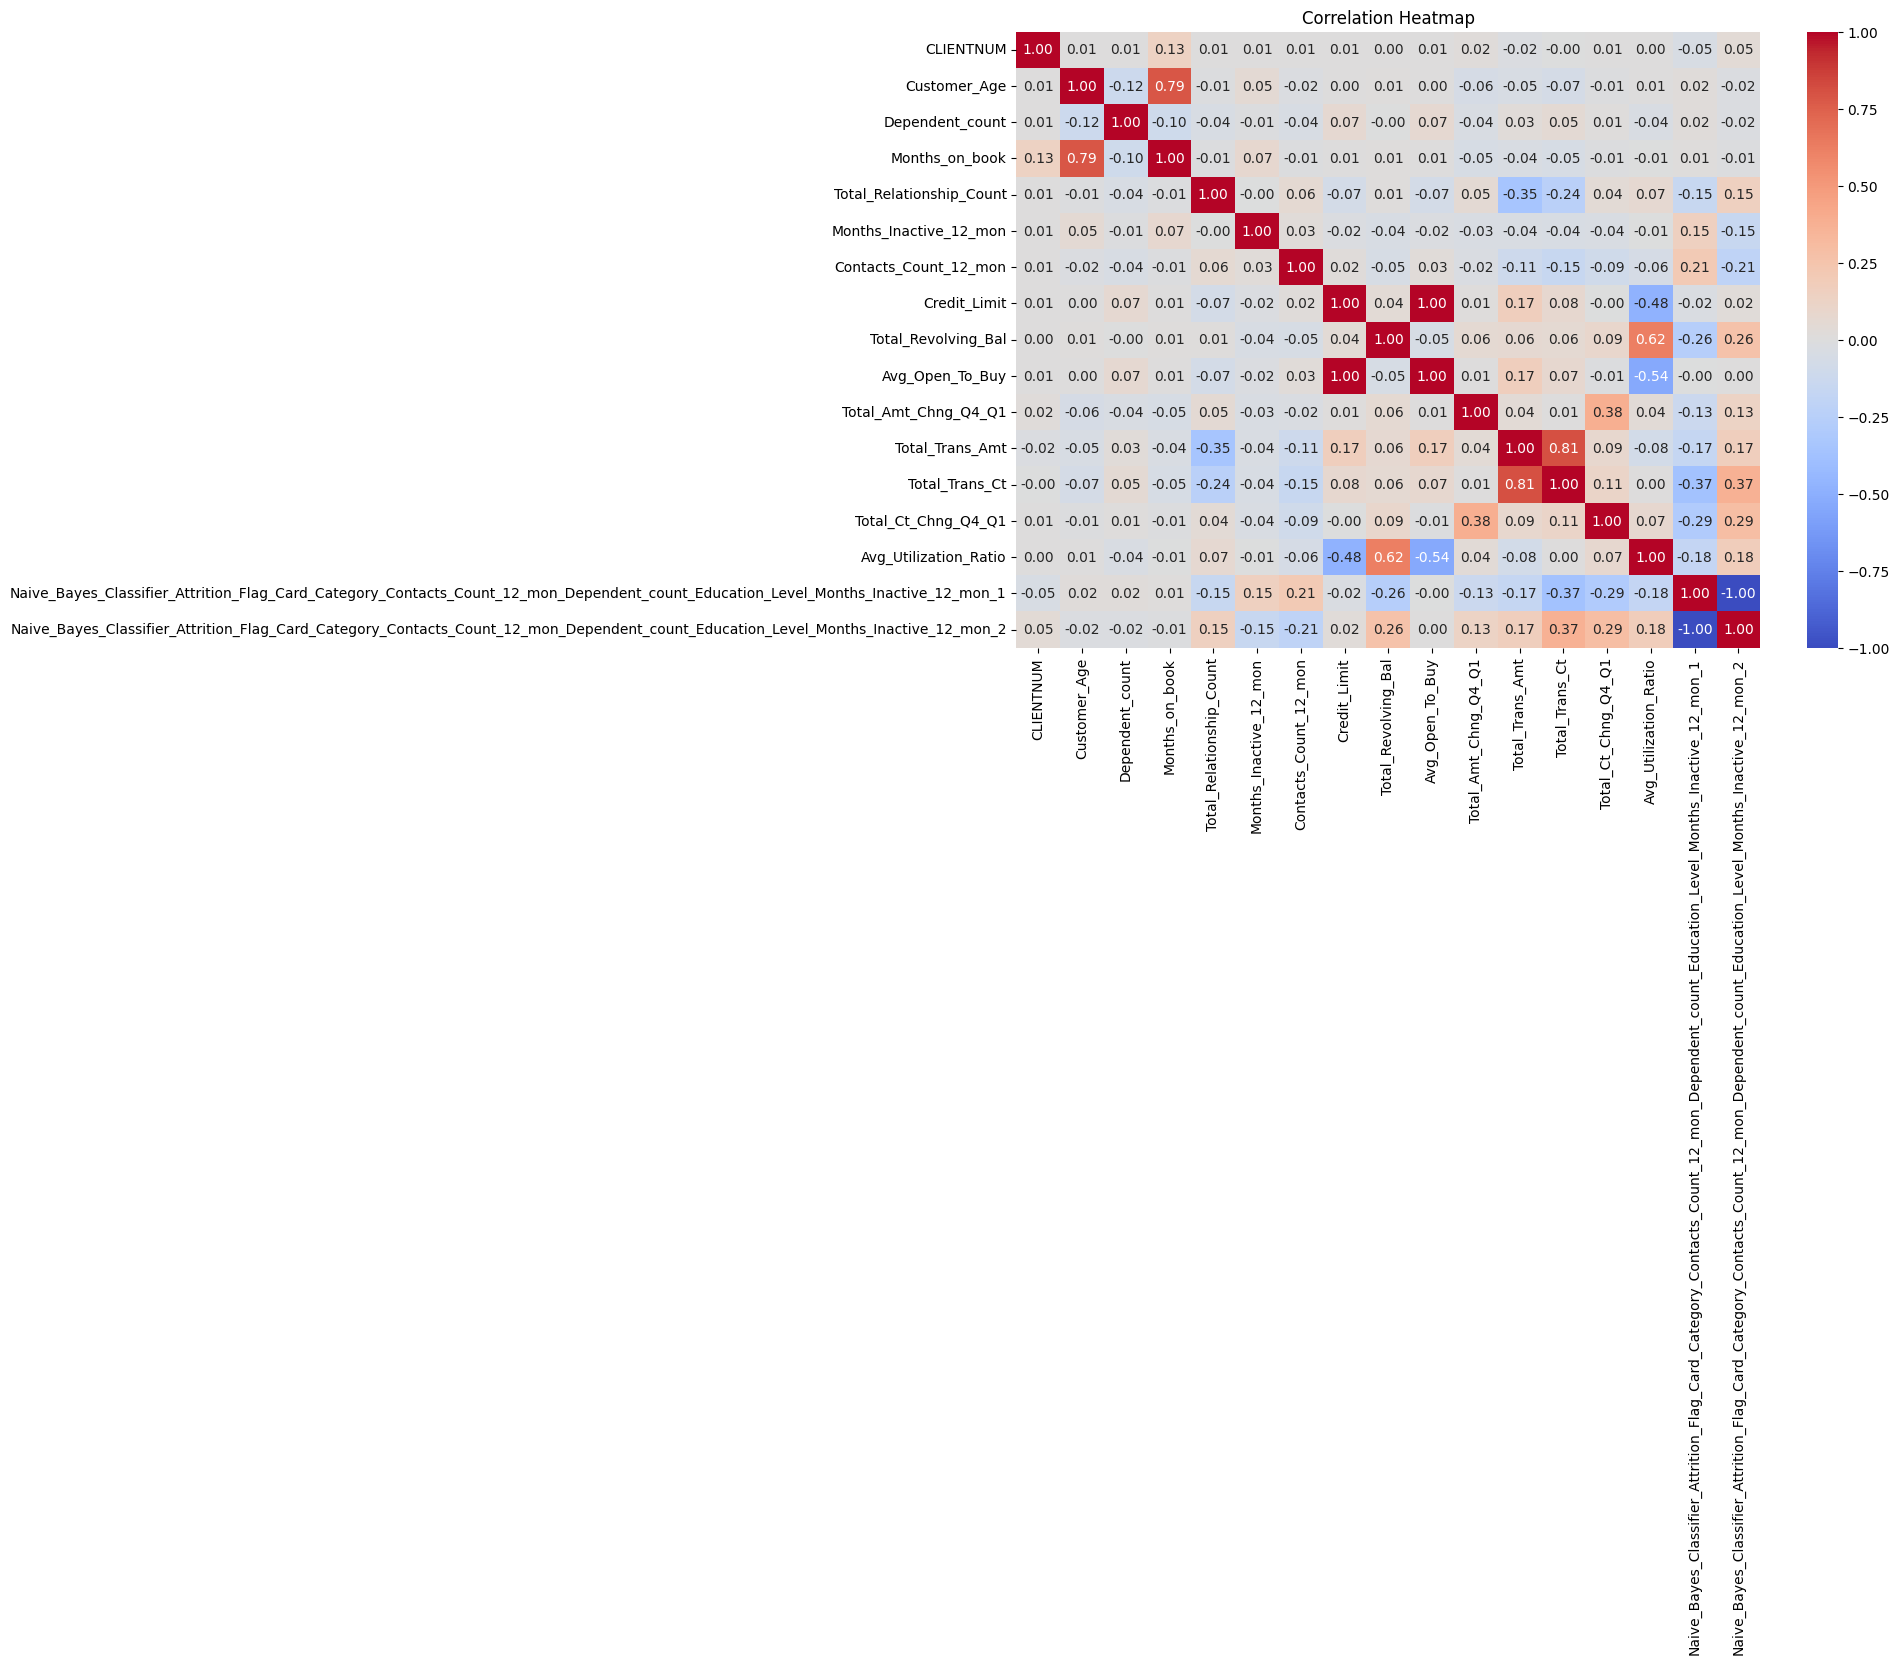

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

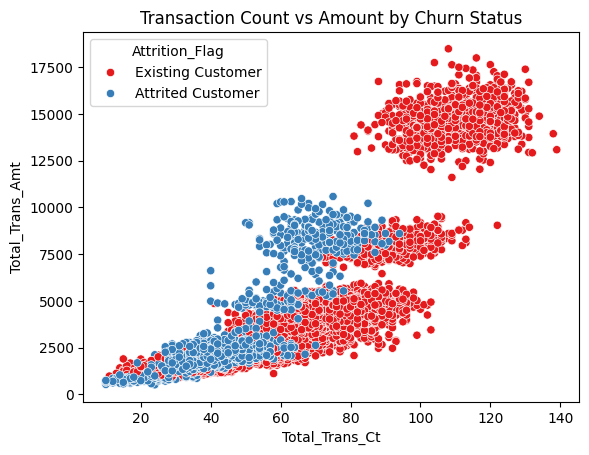

In [ ]:
sns.scatterplot(x="Total_Trans_Ct", y="Total_Trans_Amt",
                hue="Attrition_Flag", data=data, palette="Set1")
plt.title("Transaction Count vs Amount by Churn Status")
plt.show()


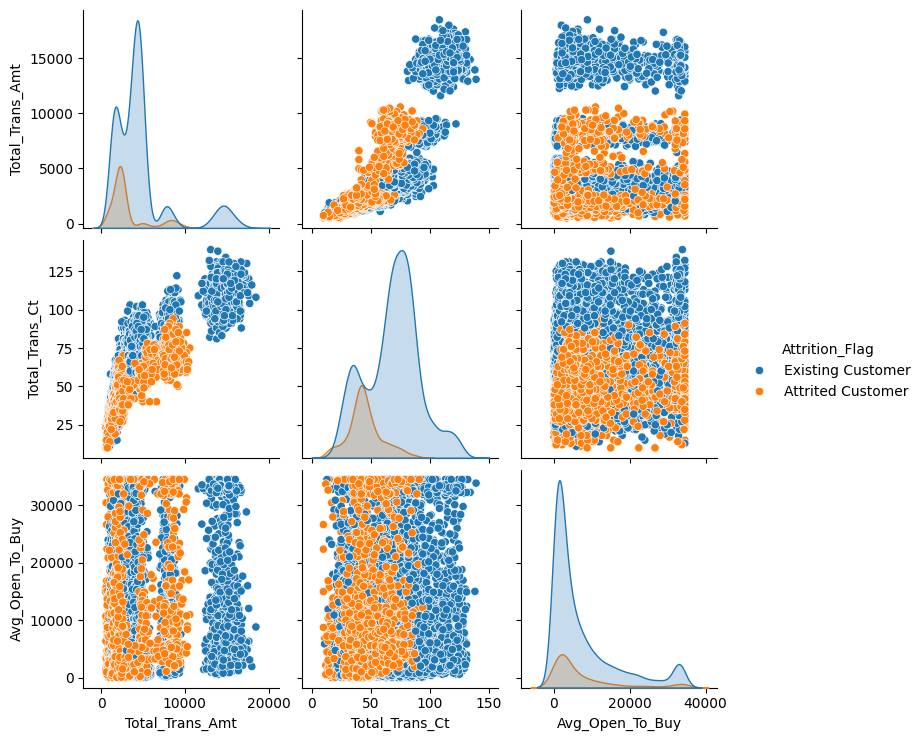

In [ ]:
sns.pairplot(data,hue='Attrition_Flag',vars=['Total_Trans_Amt','Total_Trans_Ct','Avg_Open_To_Buy'])
plt.show()

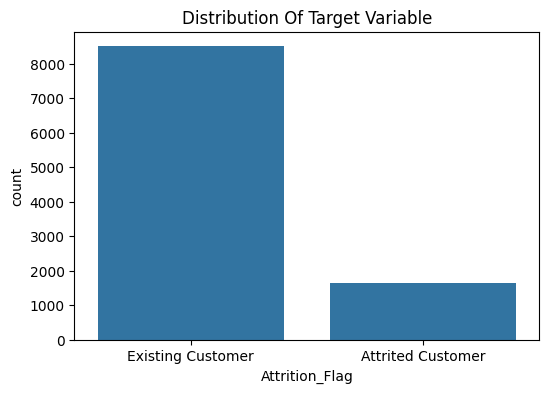

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition_Flag", data=data)
plt.title('Distribution Of Target Variable')
plt.show()

In [ ]:
columns = ['Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category','Attrition_Flag']

locoder = LabelEncoder()
for i in columns:
   data[f"{i}_label"] = locoder.fit_transform(data[i])

In [ ]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_label,Education_Level_label,Marital_Status_label,Income_Category_label,Card_Category_label,Attrition_Flag_label
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,0.000093,0.999910,1,3,1,2,0,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,0.000057,0.999940,0,2,2,4,0,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,0.000021,0.999980,1,2,1,3,0,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,0.000134,0.999870,0,3,3,4,0,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,0.000022,0.999980,1,5,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0.857,0.462,0.000191,0.999810,1,2,2,1,0,1
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0.683,0.511,0.995270,0.004729,1,6,0,1,0,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0.818,0.000,0.997880,0.002118,0,3,1,4,0,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.722,0.000,0.996710,0.003294,1,2,3,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
x = data.drop(['Gender','Education_Level','Marital_Status','Income_Category','Card_Category','Attrition_Flag','Attrition_Flag_label'],axis=1)
y = data['Attrition_Flag_label']

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
Logistic_Regression = LogisticRegression()
LR_model = Logistic_Regression.fit(x_train,y_train)

Naive_Bayes = GaussianNB()
NB_model = Naive_Bayes.fit(x_train,y_train)

KNN = KNeighborsClassifier()
Knn_model = KNN.fit(x_train,y_train)

SVM = SVC()
SVM_model = SVM.fit(x_train,y_train)

DecisionTree = DecisionTreeRegressor()
DT_model = DecisionTree.fit(x_train,y_train)

RandomForest = RandomForestRegressor()
RF_model = RandomForest.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

In [ ]:
from sklearn.svm import SVC

grid = GridSearchCV(estimator=SVM_model,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)

In [ ]:
SVM_model=grid.fit(x_train,y_train)

In [ ]:
print("Best Parameters:")
print(grid.best_params_)

best_svc = grid.best_estimator_

y_pre = best_svc.predict(x_test)

Best Parameters:
{'C': 0.1, 'gamma': 'scale'}


In [ ]:
print("\n Accuracy:", accuracy_score(y_test, y_pre))
print("\n Classification Report:\n", classification_report(y_test, y_pre))


 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()
params = {
    #'criterion': ['gini', 'entropy']
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid = GridSearchCV(estimator=DT_model,param_grid=params,cv=3,scoring="accuracy",n_jobs=1)

In [ ]:
grid = GridSearchCV(DT_model, params, cv=5)
DT_model = grid.fit(x_train, y_train)

In [ ]:
print("Best Parameters:")
print(grid.best_params_)

Best Parameters:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_dt = grid.best_estimator_

In [ ]:
y_pre = best_dt.predict(x_test)

In [ ]:
print("\n Accuracy:", accuracy_score(y_test, y_pre))
print("\n Classification Report:\n", classification_report(y_test, y_pre))


 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier()

param_dist = {
    'n_estimators': np.arange(100, 1000, 100),      # number of trees
    'max_depth': [None, 5, 10, 20, 30],             # depth of each tree
    'min_samples_split': [2, 5, 10],                # split threshold
    'min_samples_leaf': [1, 2, 4],                  # leaf threshold
    'max_features': ['sqrt'],                           # feature sampling
    'bootstrap': [True, False]                      # sampling mode
}

In [ ]:
random_search = RandomizedSearchCV(estimator=RF_model,param_distributions=param_dist,n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
RF_model=random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
print("Best Parameters Found:")
print(random_search.best_params_)

Best Parameters Found:
{'n_estimators': np.int64(500), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [ ]:
best_rf = random_search.best_estimator_

In [ ]:
y_pre = best_rf.predict(x_test)

In [ ]:
print("\n Accuracy:", accuracy_score(y_test, y_pre))
print("\n Classification Report:\n")
print(classification_report(y_test, y_pre))


 Accuracy: 1.0

 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [ ]:
def result(model):
  y_pre = model.predict(x_test)
  acc = accuracy_score(y_test, y_pre)
  prec = precision_score(y_test, y_pre)
  rec = recall_score(y_test, y_pre)
  f1 = f1_score(y_test, y_pre)
  return acc, prec, rec, f1

In [ ]:
models = [LR_model,NB_model,Knn_model,SVM_model ,DT_model,RF_model]
for model in models:
  acc, prec, rec, f1 = result(model)
  print("\tmodel: ",model)
  print("Accuracy: ",acc)
  print("Precision: ",prec)
  print("Recall: ",rec)
  print("F1: ",f1)

	model:  LogisticRegression()
Accuracy:  0.8385982230997039
Precision:  0.8385982230997039
Recall:  1.0
F1:  0.9122147651006711
	model:  GaussianNB()
Accuracy:  0.8385982230997039
Precision:  0.8385982230997039
Recall:  1.0
F1:  0.9122147651006711
	model:  KNeighborsClassifier()
Accuracy:  0.8178677196446199
Precision:  0.8389398572884812
Recall:  0.9688051795173631
F1:  0.8992078667030866
	model:  SVC()
Accuracy:  0.8385982230997039
Precision:  0.8385982230997039
Recall:  1.0
F1:  0.9122147651006711
	model:  DecisionTreeRegressor()
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
	model:  RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    'Logistic_Regression': LR_model,
    'Naive_Bayes': NB_model,
    'KNN': Knn_model,
    'SVM': SVM_model,
    'Decision_Tree': DT_model,
    'Random_Forest': RF_model,
}

results = []

for name, model in models.items():
    y_pre = model.predict(x_test)
    acc = accuracy_score(y_test, y_pre)
    prec = precision_score(y_test, y_pre)
    rec = recall_score(y_test, y_pre)
    f1 = f1_score(y_test, y_pre)


    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1', ascending=False))



                 Model  Accuracy  Precision    Recall        F1
4        Decision_Tree  1.000000   1.000000  1.000000  1.000000
5        Random_Forest  1.000000   1.000000  1.000000  1.000000
1          Naive_Bayes  0.838598   0.838598  1.000000  0.912215
0  Logistic_Regression  0.838598   0.838598  1.000000  0.912215
3                  SVM  0.838598   0.838598  1.000000  0.912215
2                  KNN  0.817868   0.838940  0.968805  0.899208
